<a href="https://colab.research.google.com/github/mwahajkhan/Machine-Learning/blob/Customer-Happiness/Customer_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background:

The goal of the Customer Happiness Prediction Project is to develop a machine learning model that can accurately predict customer happiness based on survey responses. By identifying the key factors that influence customer satisfaction, the project aims to provide actionable insights that will enable the company to enhance its services, improve customer experiences, and ultimately increase customer happiness. Achieving an accuracy score of 73% or higher will validate the effectiveness of the model in predicting customer satisfaction, thus supporting the company's global expansion strategy and commitment to customer satisfaction
Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

### Data:

The data for this project is collected by the survey from customers. The data includes customer survey responses aimed at gauging customer happiness. It consists of the following attributes:

> Y: Target attribute indicating customer happiness (0 = unhappy, 1 = happy)

> X1: My order was delivered on time

> X2: Contents of my order were as I expected

> X3: I ordered everything I wanted to order

> X4: I paid a good price for my order

> X5: I am satisfied with my courier

> X6: The app makes ordering easy for me

> Each attribute (X1 to X6) is rated on a scale from 1 to 5, where a lower number indicates dissatisfaction and a higher number indicates satisfaction. The data was collected through a survey conducted among a select customer cohort, providing valuable insights into various aspects of customer satisfaction related to the delivery service.


[Download Data](https://drive.google.com/open?id=1KWE3J0uU_sFIJnZ74Id3FDBcejELI7FD)

#### Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.



#### Success Metrics:

To reach 73% accuracy score or above, through appropriate model, that can generate actionable insights from data, to predicte measures for  business to improve customer service.

In [4]:
import sklearn

In [61]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import datetime

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# required machine learning packages
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.neighbors import KNeighborsClassifier

In [8]:
path = '/content/sample_data/ACME-HappinessSurvey2020.csv'
file = pd.read_csv(path)

In [15]:
file

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


## EDA

In [16]:
#seeing if there are any null values
file.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [17]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [18]:
file.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
file.shape

(126, 7)

<Axes: ylabel='count'>

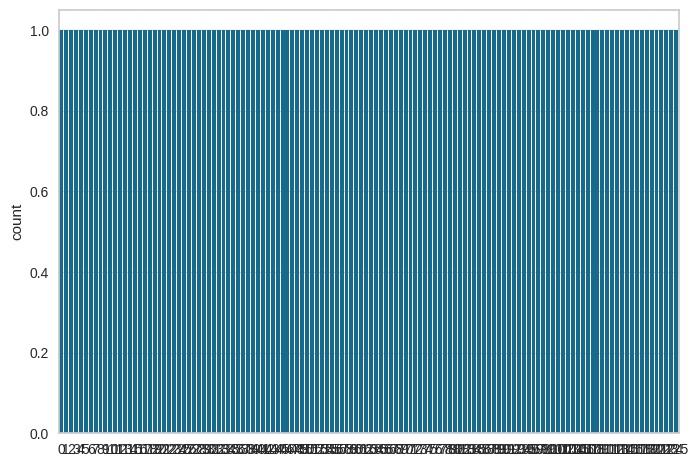

In [23]:
#looks like most of the customers are overall happy.
#['Y'] extracts y column of binary(0/1) indicating customer happines
sns.countplot(file['Y'])

<Axes: >

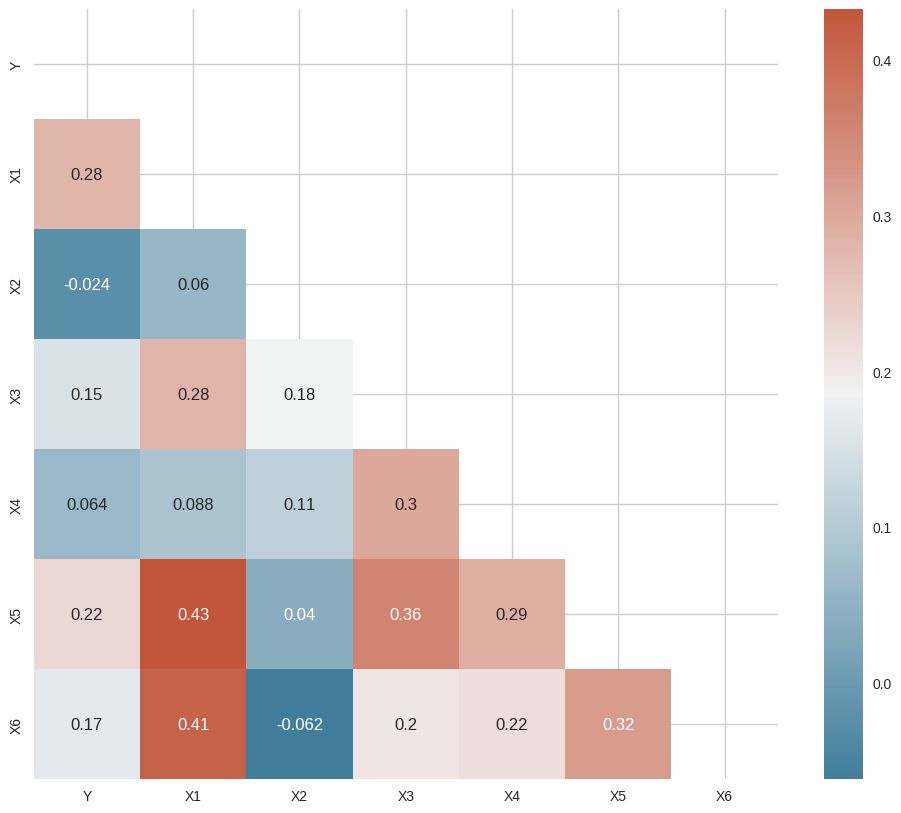

In [24]:
#correlation between survey answers
corr = file.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Modeling
#### The following three models best suited the given dataset:

* Logistic Regression Models

* Decesion Tree Classifier

* Random Forest Classifier

* KneighborsClassifier

In [28]:
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()

In [29]:
X = file.drop(['Y'], axis=1)
y = file.Y

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 30)

### Baseline Model

In [31]:
logreg.fit(X_train, y_train)
kfold_validation=KFold(10)
results = cross_val_score(logreg,X,y, cv=kfold_validation)
results.mean()


0.5557692307692308

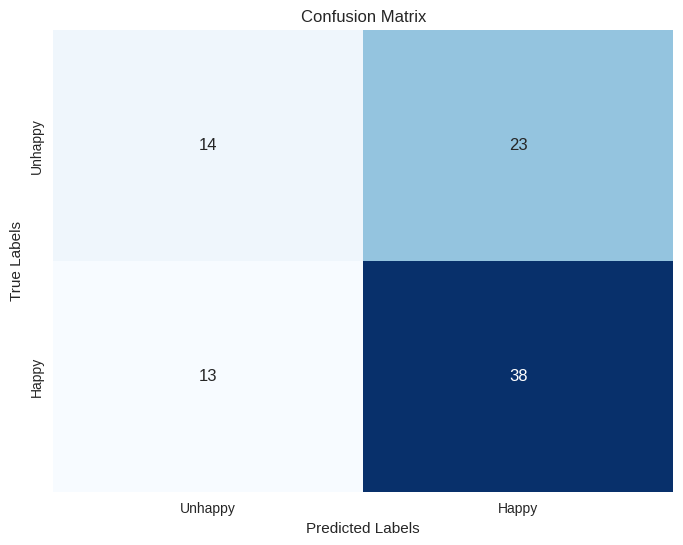

In [39]:

# Make predictions on the training data
y_train_pred = logreg.predict(X_train)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [52]:
dtc_model = dtc.fit(X_train, y_train)

kfold_validation=KFold(10)
results = cross_val_score(dtc,X,y, cv=kfold_validation)
results.mean()

0.49102564102564106

*Low validation score indicating the model not best fit for this dataset*

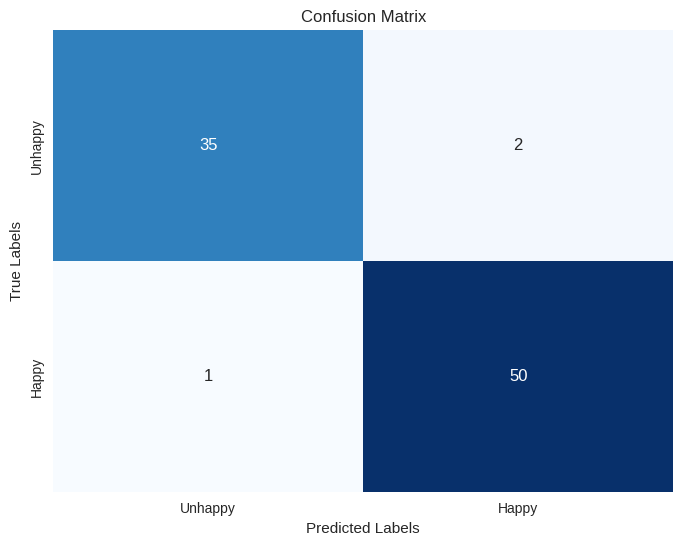

In [62]:

# Train the decision tree classifier
dtc.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = dtc.predict(X_train)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [64]:
rfc.fit(X_train, y_train)

kfold_validation=KFold(10)
results = cross_val_score(rfc,X,y, cv=kfold_validation)
results.mean()

0.4833333333333333

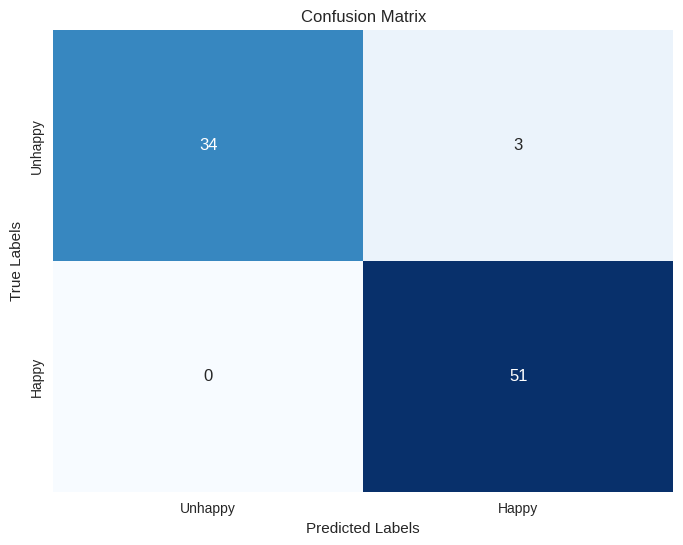

In [66]:

# Train the decision tree classifier
rfc.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = rfc.predict(X_train)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [67]:
knc.fit(X_train, y_train)

kfold_validation=KFold(10)
results = cross_val_score(knc,X,y, cv=kfold_validation)
results.mean()

0.4916666666666667

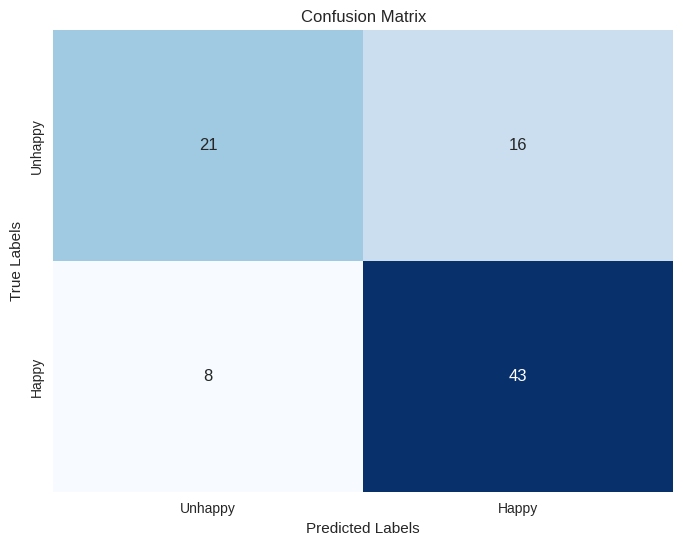

In [69]:

# Train the decision tree classifier
knc.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = knc.predict(X_train)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


### Feature Selection

##### We will first implement Univariate Selection method to statistically test what the best features are best used in this model

##### Utilizing the chi-square method as the features are categorical to categorical and the chi test displays that the best

[** Feature Selection Help Link](https://youtu.be/EqLBAmtKMnQ)

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [71]:
bestfeatures= SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [72]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [73]:
featurescore = pd.concat([dfcolumns, dfscores], axis = 1)
featurescore.columns = ['question', 'chiscore']
featurescore

,question,chiscore
0,X1,1.449041
1,X2,0.036161
2,X3,0.900104
3,X4,0.106194
4,X5,2.273286
5,X6,0.541070


In [74]:
best_four= featurescore.nlargest(4,'chiscore')

In [75]:
#these are the best four features for our model.
best_four

,question,chiscore
4,X5,2.273286
0,X1,1.449041
2,X3,0.900104
5,X6,0.541070


### Model Improvements

In [76]:
X_2 = file.drop(['Y', 'X2','X4'], axis =1)
y_2 = file.Y

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2,y_2, test_size=0.3)

In [78]:
logistic_regression_params={'solver': ['liblinear'], 'max_iter':[40]}
decision_tree_params={'splitter': ['best'], 'max_features': [4]}
random_forrest_params={'n_estimators': [50, 100, 150, 200],'max_depth': [2, 5, 10, None]}
k_neighbors_params = {'n_neighbors':[3]}

In [79]:
dt_grid=GridSearchCV(DecisionTreeClassifier(),decision_tree_params, scoring="accuracy",cv=3,verbose=1)
dt_grid.fit(X_train2,y_train2)
dt_pred =dt_grid.predict(X_2)
print(accuracy_score(y_2,dt_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.7936507936507936


Fitting 3 folds for each of 1 candidates, totalling 3 fits


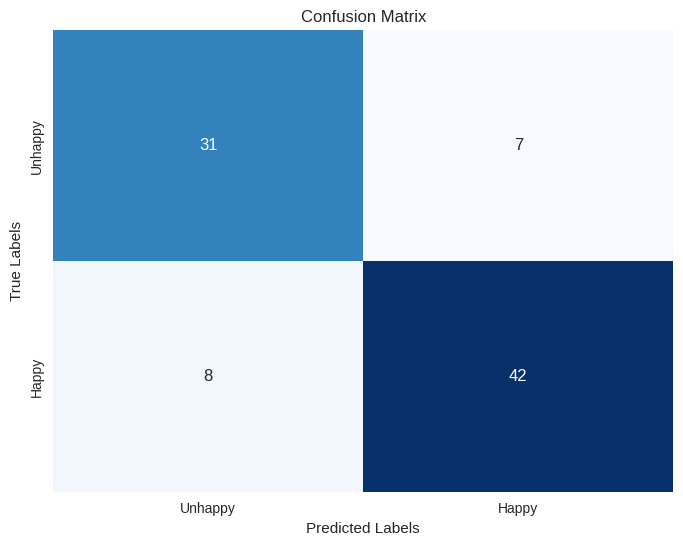

In [84]:

# Train the decision tree classifier
dt_grid.fit(X_train2, y_train2)

# Make predictions on the training data
y_train2_pred = dt_grid.predict(X_train2)

# Compute the confusion matrix
cm = confusion_matrix(y_train2, y_train2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [85]:
log_grid=GridSearchCV(LogisticRegression(),logistic_regression_params, scoring="accuracy",cv=3,verbose=1)
log_grid.fit(X_train2,y_train2)
log_pred =log_grid.predict(X_2)
print(accuracy_score(y_2,log_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.6031746031746031


Fitting 3 folds for each of 1 candidates, totalling 3 fits


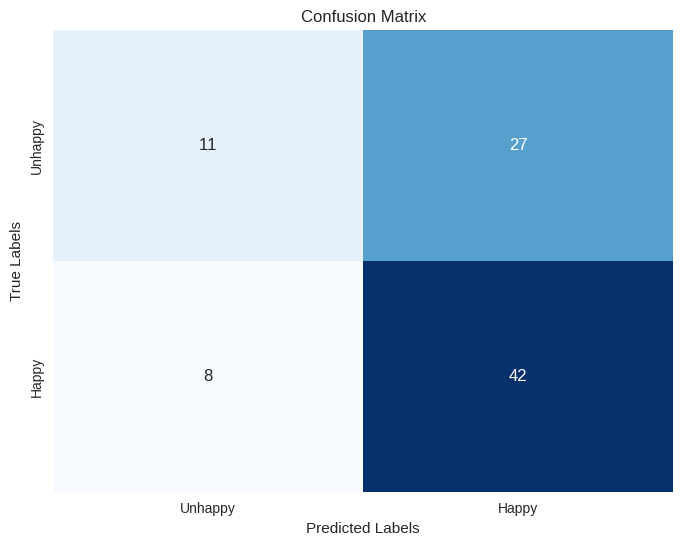

In [87]:
log_grid.fit(X_train2, y_train2)

# Make predictions on the training data
y_train2_pred = log_grid.predict(X_train2)

# Compute the confusion matrix
cm = confusion_matrix(y_train2, y_train2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [90]:
rand_grid=GridSearchCV(RandomForestClassifier(),random_forrest_params, scoring="accuracy",cv=3,verbose=1)
rand_grid.fit(X_train2,y_train2)
rand_pred =rand_grid.predict(X_2)
print(accuracy_score(y_2,rand_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
0.7936507936507936


Fitting 3 folds for each of 16 candidates, totalling 48 fits


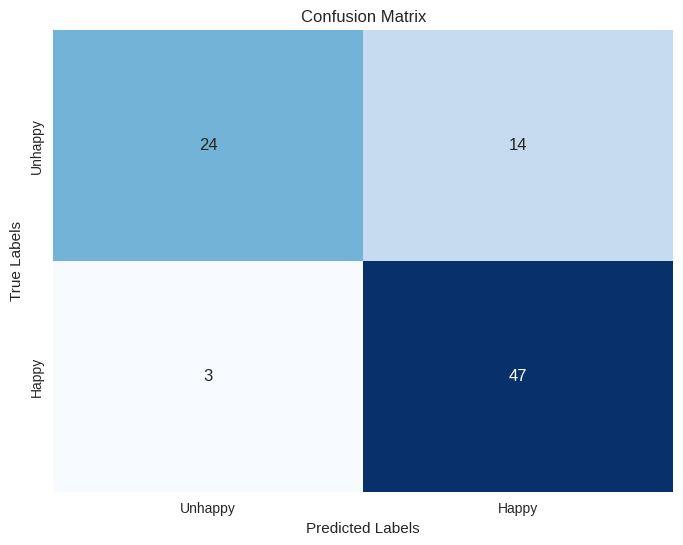

In [89]:
rand_grid.fit(X_train2, y_train2)

# Make predictions on the training data
y_train2_pred = rand_grid.predict(X_train2)

# Compute the confusion matrix
cm = confusion_matrix(y_train2, y_train2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [91]:
kn_grid=GridSearchCV(KNeighborsClassifier(),k_neighbors_params, scoring="accuracy",cv=3,verbose=1)
kn_grid.fit(X_train2,y_train2)
kn_pred =kn_grid.predict(X_2)
print(accuracy_score(y_2,kn_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.746031746031746


Fitting 3 folds for each of 1 candidates, totalling 3 fits


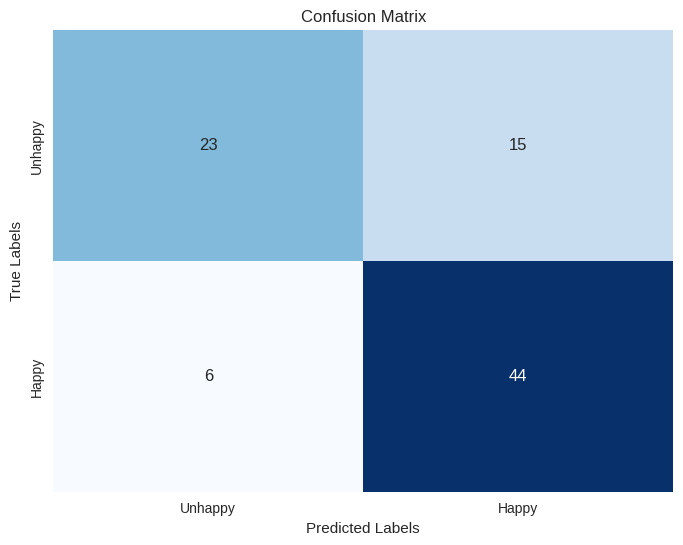

In [92]:
# Assuming 'dt_grid' is your trained model
# Train the decision tree classifier
kn_grid.fit(X_train2, y_train2)

# Make predictions on the training data
y_train2_pred = kn_grid.predict(X_train2)

# Compute the confusion matrix
cm = confusion_matrix(y_train2, y_train2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


### Conclusion

The best performing model is the Decision Tree. The model predicts with a 81% accuracy and can properly account for a yes or no based on the target answer of "Y"

This model was decided upon by utilizing a Grid Search for the best hyper parameters and the feature selection was done based upon a CHI- Test which demonstrates which feature is the most useful towards calculating the Target Variable.

### Accuracy
#### .80


The Features that were utilized consist of


X1 = my order was delivered on time
X3 = I ordered everything I wanted to order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

These features have the most importance to help model make predictions.


Eliminating the questions

X2 = contents of my order was as I expected
X4 = I paid a good price for my order

it appears that the above questions have the least hold on whether or not a customer is happy.


### Future Analysis

I believe the model can be improved with further feature selection. Maybe based upon a wrapper method instead of a filter method.

The data set is rather small we could be improved with a greater data set

Some scaling may improve the model as well. stating that the 5s weigh heavier than the 3 andswers per say.

As this is a model to predict the happiness of the customer we might want to explore not only the accuracy of the model but the precision as well.